## （上一章节）过拟合与欠拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model.base import LinearRegression
from sklearn.metrics.scorer import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing.data import PolynomialFeatures
from sklearn.preprocessing.data import StandardScaler


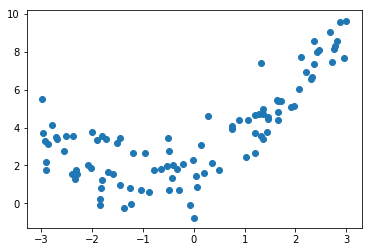

In [2]:
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x+2 + np.random.normal(0,1,size=100)
plt.scatter(x,y)
plt.show()

## 使用线性回归

In [3]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.score(X, y)

/usr/local/seamonster/MachineLearningClassicAlgorithmEnv/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


0.49537078118650091

可以看到R方值很低（欠拟合）  
画个图来看看效果

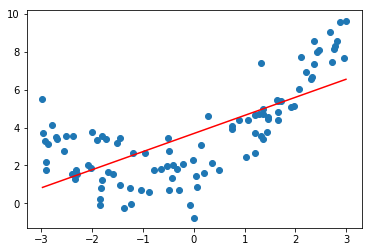

In [4]:
y_predict = lin_reg.predict(X)
plt.scatter(x,y)
# 直线就是拟合的线
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

对于多项式回归，使用R方值作为评估是没有问题的  
但是不明白这老师到底出于什么原因，要使用MSE（均方误差）-- 姑且理解是为了方便吧

In [5]:
y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

3.0750025765636577

## 使用多项式回归

In [6]:
def PolynomialRegression(degree):
    return Pipeline(
        [
            ('poly', PolynomialFeatures(degree=degree)),
            ('std_scaler', StandardScaler()),
            ('lin_reg',LinearRegression())
        ]
    )

In [7]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [8]:
y2_predict = poly2_reg.predict(X)
mean_squared_error(y, y2_predict)

1.0987392142417856

可以看到使用多项式回归后，均方误差比使用线性回归低得多  
数据可视化效果如下：

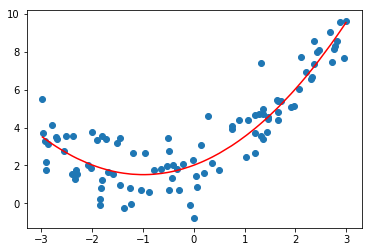

In [9]:
plt.scatter(x,y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')
plt.show()

### degree为10的情况

In [10]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X, y)
y10_predict = poly10_reg.predict(X)
mean_squared_error(y, y10_predict)

1.0508466763764155

均方误差更低了  
拟合曲线是什么样子呢？

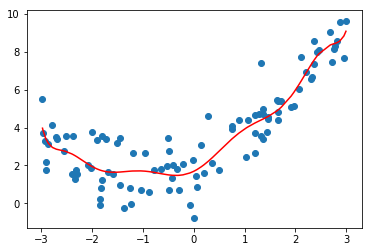

In [11]:
plt.scatter(x,y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')
plt.show()

### degree为100的情况

In [12]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)
y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.6531777810504289

均方误差的值更低了（注意，本章节没有使用训练集和测试集的分离，所以这个误差都是针对训练样本的，自然是degree越大误差越小）

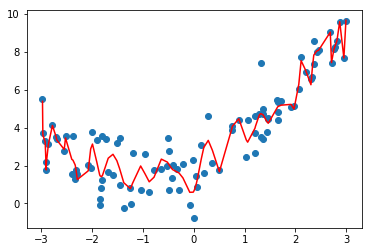

In [13]:
plt.scatter(x,y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')
plt.show()

如果x在-3到3之间均匀分布，那么对应degree=100的拟合曲线，它的y值会是怎么样呢？

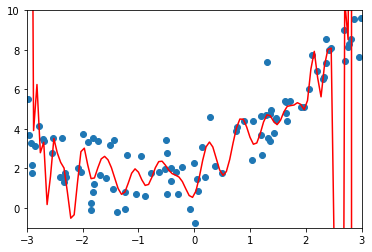

In [14]:
x_plot = np.linspace(-3,3,100).reshape(100,1)
y_plot = poly100_reg.predict(x_plot)

plt.scatter(x,y)
plt.plot(x_plot[:,0], y_plot, color='r')
plt.axis([-3,3,-1,10])  # 坐标轴，x轴取-3到3，y轴取-1到10
plt.show()

# train test split的意义

In [15]:
from sklearn.model_selection._split import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=666)

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

2.2199965269396573

In [17]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X_train, y_train)
y2_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

0.80356410562978997

可以看到使用2阶多项式回归比线性回归的均方误差更小，泛化能力更强

In [18]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X_train, y_train)
y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test, y10_predict)

0.92129307221507861

改为10阶多项式回归时，均方误差比2阶多项式回归时反而更大了  
换句话说，泛化能力变差了

In [19]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X_train, y_train)
y100_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test, y100_predict)

117971955554.10373

改为100阶多项式回归时，均方误差高得吓人